In [16]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [18]:
house_data = pd.read_csv('kc_house_data.csv', parse_dates =[0])

In [31]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1970-01-01 00:00:00.000001933,1970-01-01 00:00:00.000000000,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,98074,47.6168,-122.045,1800,7503


In [20]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [33]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['yr_built'] = pd.to_datetime(house_data['yr_built'])
house_data['yr_renovated'] = pd.to_datetime(house_data['yr_renovated'])

house_data.isnull().sum()

In [22]:
house_data.duplicated().sum()

0

In [34]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [35]:
house_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:>

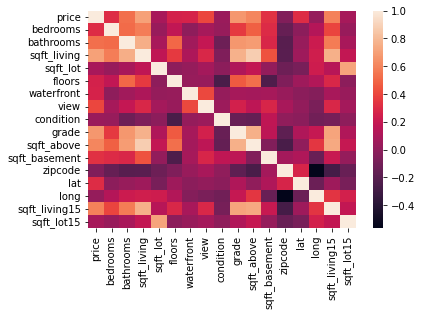

In [36]:
sb.heatmap(house_data.corr())

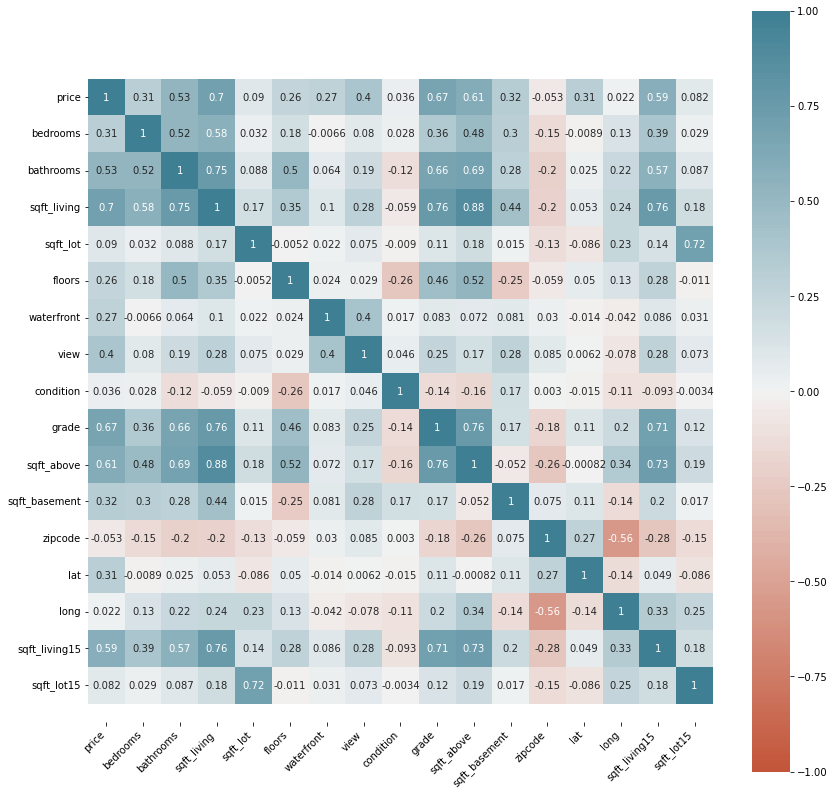

In [37]:
corr = house_data.corr()

plt.figure(figsize=(14, 14))
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

plt.show()

In [28]:
#checking for outliers
from scipy import stats
import numpy as np

z= np.abs(stats.zscore(house_data['price']))

z
len(np.where(z > 3)[0])

406

In [29]:
z

0        0.866717
1        0.005688
2        0.980849
3        0.174090
4        0.081958
           ...   
21608    0.490545
21609    0.381588
21610    0.375865
21611    0.381588
21612    0.585882
Name: price, Length: 21613, dtype: float64

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

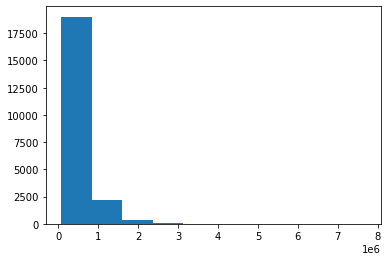

In [41]:
plt.hist(house_data['price'])

(array([7.5690e+03, 1.0681e+04, 2.8140e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  290.,  1615.,  2940.,  4265.,  5590.,  6915.,  8240.,  9565.,
        10890., 12215., 13540.]),
 <BarContainer object of 10 artists>)

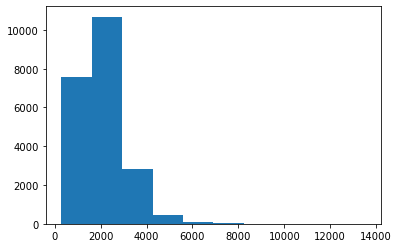

In [44]:
plt.hist(house_data['sqft_living'])

The features importatnt for the building this models are as follows;
sqft_living, grade, sqft_above, bathrooms, sqft_living15.

They were chosen based on their correlation with the Label 'price'. Although, some of the features correlate with themselves which is mot recomended in multi-liner regression aloghrith.

In [51]:
#Simple Linear Regression
X = house_data.loc[:, 'sqft_living'].values.reshape(-1, 1)
Y = house_data.loc[:, 'price'].values

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [54]:
#Spliting of the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=30)

In [55]:
model= LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [56]:
model.coef_

array([282.53959684])

In [57]:
model.intercept_

-46813.8159424389

In [58]:
#mathematical expression
#Y = 282.54X - 46813.82

In [59]:
Y_pred = model.predict(X_test)
Y_pred

array([532392.35758624, 625630.42454452, 625630.42454452, ...,
       862963.68589286, 868614.47782972, 549344.73339684])

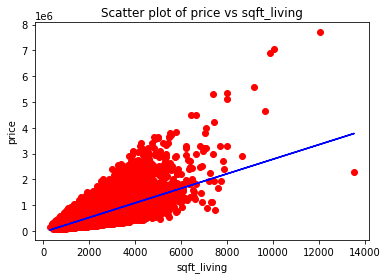

In [61]:
plt.scatter(X,Y, color= 'r')
plt.plot(X, model.predict(X) ,color = 'b')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Scatter plot of price vs sqft_living')
plt.show()

In [62]:
#mean squared error

mean_squared_error(Y_test, Y_pred)

64179676631.683876

In [63]:
#R-Squared
metrics.r2_score(Y_test,Y_pred)

0.4879814110728805

The result of this Regression alogrithm shows that the model did mot learn anything.

Multi-Linear Regression

In [64]:
#Feature Selection
y = house_data['price'].values
x = house_data[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'sqft_living15']]

In [65]:
# scale the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_scaled = sc.fit_transform(x)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.2, random_state=30)
model.fit(x_train, y_train)

LinearRegression()

In [70]:
model.coef_

array([230736.84531692, 127018.46049959, -70305.59857787, -27579.74943198,
        19142.40280528])

In [71]:
model.intercept_

540572.8264751481

In [73]:
y_pred = model.predict(x_test)

In [75]:
#MSE
mean_squared_error(y_test, y_pred)

56785447189.66365

In [76]:
#R2
metrics.r2_score(y_test,y_pred)

0.5469717819161876

The linear and Multi-linear regressions do not apply as a solution to build a good model for this given dataset.